In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#config
device = torch.device('cuda') # or 'cpu'

In [10]:
# Param
num_epochs = 20
num_classes = 10
batch_size = 100
learning_rate = 0.002

In [11]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/', train=True, transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='../../data/', train=False, transform=transforms.ToTensor())

# Data load
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

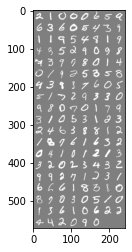

In [5]:

# function to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images from dataset
dataiter = iter(train_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))

In [12]:
# CNN(three layer)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7 * 7 * 32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out


model = ConvNet(num_classes).to(device)
print (model)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


In [13]:
# Loss and optimize
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:

# Train
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprop and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/20], Step [100/600], Loss: 0.8482
Epoch [1/20], Step [200/600], Loss: 0.5080
Epoch [1/20], Step [300/600], Loss: 0.3463
Epoch [1/20], Step [400/600], Loss: 0.2820
Epoch [1/20], Step [500/600], Loss: 0.3539
Epoch [1/20], Step [600/600], Loss: 0.1752
Epoch [2/20], Step [100/600], Loss: 0.1844
Epoch [2/20], Step [200/600], Loss: 0.2578
Epoch [2/20], Step [300/600], Loss: 0.1753
Epoch [2/20], Step [400/600], Loss: 0.1838
Epoch [2/20], Step [500/600], Loss: 0.1684
Epoch [2/20], Step [600/600], Loss: 0.1604
Epoch [3/20], Step [100/600], Loss: 0.1037
Epoch [3/20], Step [200/600], Loss: 0.1979
Epoch [3/20], Step [300/600], Loss: 0.1691
Epoch [3/20], Step [400/600], Loss: 0.1846
Epoch [3/20], Step [500/600], Loss: 0.1302
Epoch [3/20], Step [600/600], Loss: 0.0950
Epoch [4/20], Step [100/600], Loss: 0.1267
Epoch [4/20], Step [200/600], Loss: 0.1461
Epoch [4/20], Step [300/600], Loss: 0.1066
Epoch [4/20], Step [400/600], Loss: 0.0723
Epoch [4/20], Step [500/600], Loss: 0.0825
Epoch [4/20

In [16]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Model Accuracy on the 10000 test images: {} %'.format(100 * correct / total))


Model Accuracy on the 10000 test images: 98.62 %
